In [71]:
import netCDF4
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [29]:
file_o00 = "/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o00_01.nc"

In [30]:
rootgrp = netCDF4.Dataset(file_o00, "r", format="NETCDF4")

In [43]:
# print(rootgrp)
# print(rootgrp.data_model)
# print(rootgrp.dimensions)
# print(len(rootgrp.dimensions.get("lat")))
# print(len(rootgrp.dimensions.get("lon")))

# get the dimensions
latSize = rootgrp.dimensions.get("lat").size
lonSize = rootgrp.dimensions.get("lon").size
# print(latSize)
# print(lonSize)

# declare arrays
grid = np.zeros((latSize, lonSize))
latGrid = np.zeros((latSize))
lonGrid = np.zeros((lonSize))

#get the dimension variables
ltVar = rootgrp.variables.get('lat')
lnVar = rootgrp.variables.get('lon')
# print(ltVar)
# print(lnVar)

#fill arrays
for lt in range(latSize):
    latGrid[lt] = ltVar[lt]
for ln in range(lonSize):
    lonGrid[ln] = lnVar[ln]
# print(latGrid)
# print(lonGrid)

var_name = rootgrp.variables.get('o_mn').long_name # a Variable Object
print(var_name)

var_vals = rootgrp.variables.get('o_mn')

# Fill numpy array for the O2 grid
for lt in range(latSize):
    for ln in range(lonSize):
#         print (latSize - lt - 1, end="\n")
        grid[latSize-lt-1][ln] = var_vals[0, 0, lt, ln]
#         print(lt, ln, grid[lt][ln])
print(grid)

Average of all unflagged interpolated values at each standard depth level for volume_fraction_of_oxygen_in_sea_water in each grid-square which contain at least one measurement.


/Users/oz/Miniconda/miniconda3/envs/oceanatlas/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: Warning: converting a masked element to nan.


[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


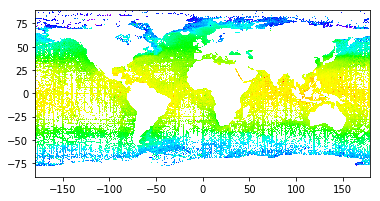

In [44]:

plt.imshow(grid, extent=(lonGrid.min(), lonGrid.max(), latGrid.min(), latGrid.max()),
          interpolation='nearest', cmap=cm.gist_rainbow) #LRBT
plt.show()

In [76]:
def summarizeWOAFile(inFile):
    rootgrp = netCDF4.Dataset(inFile, "r", format="NETCDF4")
    print("Root Group: ", rootgrp.variables, end="\n")
    print("Data Model: ", rootgrp.data_model, end="\n")
    print("Dimensions:", rootgrp.dimensions, end="\n")
#     print(len(rootgrp.dimensions.get("lat")))
#     print(len(rootgrp.dimensions.get("lon")))


In [77]:
summarizeWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o01_01.nc")

Root Group:  OrderedDict([('crs', <class 'netCDF4._netCDF4.Variable'>
int32 crs()
    grid_mapping_name: latitude_longitude
    epsg_code: EPSG:4326
    longitude_of_prime_meridian: 0.0
    semi_major_axis: 6378137.0
    inverse_flattening: 298.25723
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used
), ('lat', <class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
    bounds: lat_bnds
unlimited dimensions: 
current shape = (180,)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('lat_bnds', <class 'netCDF4._netCDF4.Variable'>
float32 lat_bnds(lat, nbounds)
    comment: latitude bounds
unlimited dimensions: 
current shape = (180, 2)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('lon', <class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X


In [78]:
def plotWOAFile(inFile, varToPlot, level):
    rootgrp = netCDF4.Dataset(inFile, "r", format="NETCDF4")
    # get the dimensions
    latSize = rootgrp.dimensions.get("lat").size
    lonSize = rootgrp.dimensions.get("lon").size

    # declare arrays
    grid = np.zeros((latSize, lonSize))
    latGrid = np.zeros((latSize))
    lonGrid = np.zeros((lonSize))

    #get the dimension variables
    ltVar = rootgrp.variables.get('lat')
    lnVar = rootgrp.variables.get('lon')
    
    #fill arrays
    for lt in range(latSize):
        latGrid[lt] = ltVar[lt]
    for ln in range(lonSize):
        lonGrid[ln] = lnVar[ln]

    var_name = rootgrp.variables.get(varToPlot).long_name # a Variable Object
    var_vals = rootgrp.variables.get(varToPlot)

    # Fill numpy array for the O2 grid
    for lt in range(latSize):
        for ln in range(lonSize):
            grid[latSize-lt-1][ln] = var_vals[0, level, lt, ln]
    plt.imshow(grid, extent=(lonGrid.min(), lonGrid.max(), latGrid.min(), latGrid.max()),
          interpolation='nearest', cmap=cm.gist_rainbow) #LRBT
    plt.show()

/Users/oz/Miniconda/miniconda3/envs/oceanatlas/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Warning: converting a masked element to nan.


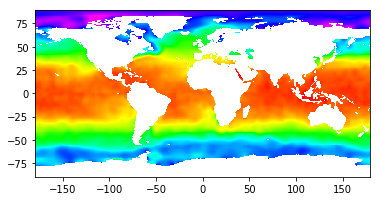

In [79]:
plotWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o00_01.nc","o_an", 0)

/Users/oz/Miniconda/miniconda3/envs/oceanatlas/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Warning: converting a masked element to nan.


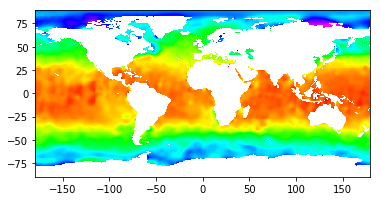

In [80]:
plotWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o01_01.nc","o_an", 0)

Root Group:  OrderedDict([('crs', <class 'netCDF4._netCDF4.Variable'>
int32 crs()
    grid_mapping_name: latitude_longitude
    epsg_code: EPSG:4326
    longitude_of_prime_meridian: 0.0
    semi_major_axis: 6378137.0
    inverse_flattening: 298.25723
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used
), ('lat', <class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
    bounds: lat_bnds
unlimited dimensions: 
current shape = (180,)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('lat_bnds', <class 'netCDF4._netCDF4.Variable'>
float32 lat_bnds(lat, nbounds)
    comment: latitude bounds
unlimited dimensions: 
current shape = (180, 2)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('lon', <class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X


/Users/oz/Miniconda/miniconda3/envs/oceanatlas/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Warning: converting a masked element to nan.


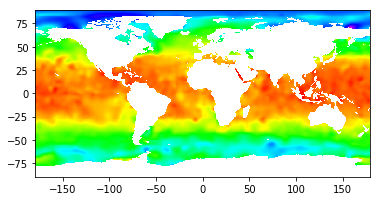

In [81]:
summarizeWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o10_01.nc")
plotWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o10_01.nc","o_an", 0)

/Users/oz/Miniconda/miniconda3/envs/oceanatlas/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Warning: converting a masked element to nan.


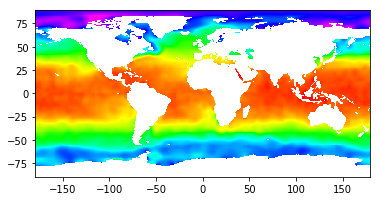

In [73]:
plotWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o00_01.nc","o_an", 0)

/Users/oz/Miniconda/miniconda3/envs/oceanatlas/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Warning: converting a masked element to nan.


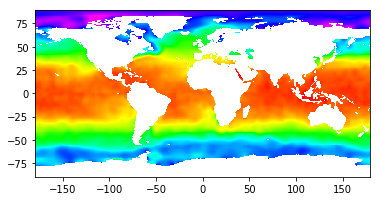

In [86]:
#The January average period
plotWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o00_01.nc","o_an", 0)


/Users/oz/Miniconda/miniconda3/envs/oceanatlas/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Warning: converting a masked element to nan.


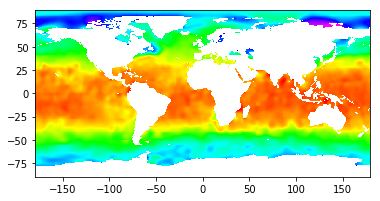

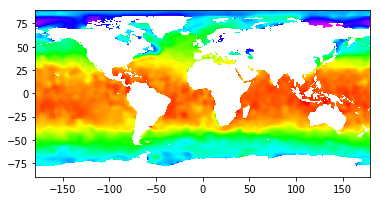

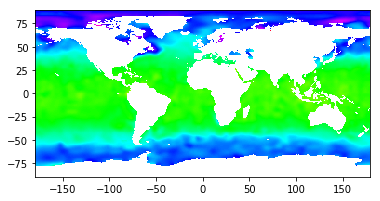

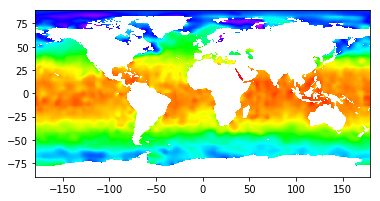

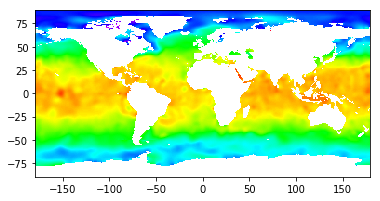

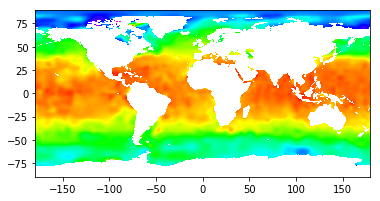

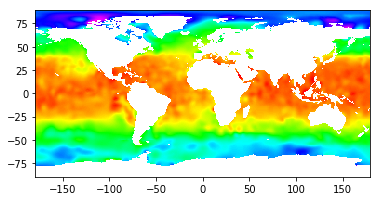

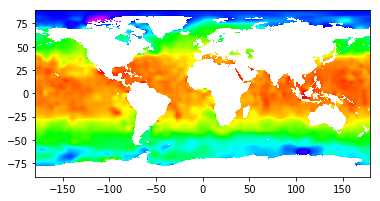

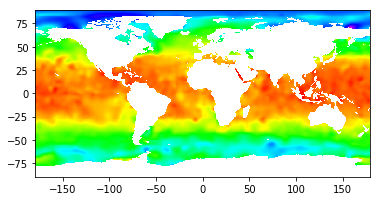

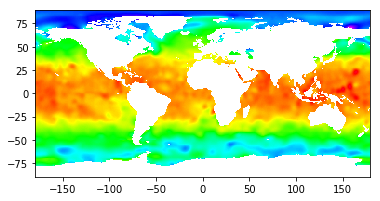

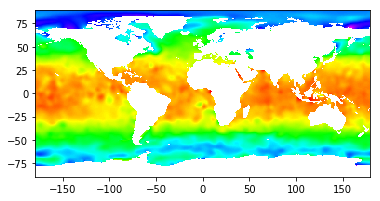

In [87]:
# december period
plotWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o02_01.nc","o_an", 0)
plotWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o03_01.nc","o_an", 0)
plotWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o04_01.nc","o_an", 0)

plotWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o05_01.nc","o_an", 0)

plotWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o06_01.nc","o_an", 0)

plotWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o07_01.nc","o_an", 0)

plotWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o08_01.nc","o_an", 0)

plotWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o09_01.nc","o_an", 0)
plotWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o10_01.nc","o_an", 0)

plotWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o11_01.nc","o_an", 0)
plotWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o12_01.nc","o_an", 0)

/Users/oz/Miniconda/miniconda3/envs/oceanatlas/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Warning: converting a masked element to nan.


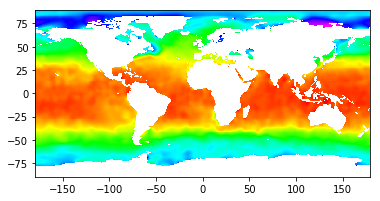

In [89]:
plotWOAFile("/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o13_01.nc","o_an", 0)